In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("https://bit.ly/2FkIaTv", sep="\t", index_col="名稱")

In [3]:
print("前五名英雄數據：")
display(df.head(5))

前五名英雄數據：


,類型,攻擊距離,魔力,魔力回復,魔力提升,生命提升,生命,生命回復,移動速度,物理攻擊,物理防禦,魔法防禦
名稱,,,,,,,,,,,,
厄薩斯,鬥士,175,0,0.0,0,90,580.0,3.0,345,60.0,38.0,32.1
阿璃,法師,550,418,0.8,25,92,526.0,6.5,330,53.0,20.9,30.0
阿卡莉,刺客,125,200,0.0,0,95,575.0,8.0,345,62.4,23.0,37.0
亞歷斯塔,坦克,125,350,0.8,40,106,573.4,8.5,330,61.1,44.0,32.1
阿姆姆,坦克,125,287,0.5,40,84,613.1,9.0,335,53.4,33.0,32.1


In [4]:
df.describe().loc['mean':'std',:].style.format("{:.2f}")

,攻擊距離,魔力,魔力回復,魔力提升,生命提升,生命,生命回復,移動速度,物理攻擊,物理防禦,魔法防禦
mean,326.39,309.66,0.57,33.03,88.52,555.83,6.60,336.31,59.37,30.06,31.13
std,196.52,115.40,0.28,16.62,6.65,37.33,1.78,7.56,6.17,6.72,1.71


In [5]:
x=df.iloc[:,1:]
sc=StandardScaler()
z_x=sc.fit_transform(x)

In [6]:
z=df.iloc[:,1:]

In [7]:
print('標準化之數據:\n')
a=pd.DataFrame(z_x)
a.columns=df.columns[1:]
a=round(a,2)
a

標準化之數據:



,攻擊距離,魔力,魔力回復,魔力提升,生命提升,生命,生命回復,移動速度,物理攻擊,物理防禦,魔法防禦
0,-0.77,-2.69,-2.02,-1.99,0.22,0.65,-2.03,1.15,0.10,1.19,0.57
1,1.14,0.94,0.84,-0.48,0.52,-0.80,-0.06,-0.84,-1.04,-1.37,-0.66
2,-1.03,-0.95,-2.02,-1.99,0.98,0.52,0.79,1.15,0.49,-1.05,3.45
3,-1.03,0.35,0.84,0.42,2.64,0.47,1.07,-0.84,0.28,2.08,0.57
4,-1.03,-0.20,-0.23,0.42,-0.68,1.54,1.35,-0.17,-0.97,0.44,0.57
...,...,...,...,...,...,...,...,...,...,...,...
142,-1.03,-0.95,-2.02,-1.99,-0.53,0.76,0.22,1.15,0.59,0.29,0.57
143,1.14,1.48,0.84,-0.61,0.52,-0.53,-0.06,-1.50,-0.84,-1.28,-0.66
144,1.14,1.24,0.84,-0.18,-0.98,-1.39,-0.62,-0.17,-1.26,-0.90,-0.66
145,1.14,1.00,0.48,-0.48,0.52,0.11,-0.06,0.49,-0.22,-1.38,-0.66


# 斜方差矩陣

In [8]:
cov_matrix=np.cov(a.T)
eigen_values,eigen_vectors=np.linalg.eig(cov_matrix)

In [9]:
cov_matrix1=np.cov(a)

In [10]:
print("eigen vlaues:\n",eigen_values)
print("eigen vectors:\n",eigen_vectors)

eigen vlaues:
 [4.51321632 2.20380824 1.03871813 0.84134207 0.14877761 0.18735109
 0.25090358 0.58065751 0.3499361  0.42745376 0.52368116]
eigen vectors:
 [[ 0.42974965  0.07116077  0.15631051  0.08236102  0.84615534  0.12741171
  -0.08763908 -0.14162905  0.13007151  0.04617017  0.00572699]
 [ 0.283102   -0.43031672 -0.00668181 -0.35516803 -0.10520927  0.60166043
   0.47414645 -0.00806299 -0.02833551 -0.09574074  0.02405167]
 [ 0.19059791 -0.56230785 -0.04154937 -0.08700933  0.09287985 -0.72963818
   0.23293226 -0.15723128 -0.10351959 -0.05683589  0.06527683]
 [ 0.14273759 -0.50359551 -0.43367089  0.1634998  -0.08861923  0.19352836
  -0.64347509 -0.04292475  0.0569983   0.20788275 -0.05951092]
 [-0.14104235 -0.32376884  0.68654907  0.30397995 -0.07644311  0.12971851
  -0.2462953  -0.14238899 -0.17483163 -0.41385062 -0.07799023]
 [-0.31587369 -0.24325671  0.15976007  0.41779982  0.09578875  0.0712555
   0.36415962  0.05826467  0.12186148  0.63641708 -0.26614517]
 [-0.30687466 -0.2089774

<BarContainer object of 11 artists>

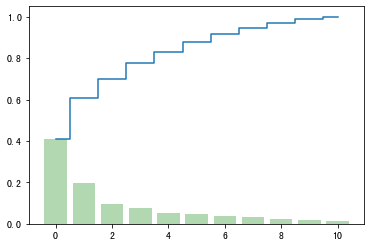

In [11]:
tot=sum(eigen_values)# 總特徵值和
var_exp=[(i/tot) for i in sorted(eigen_values,reverse=True)]# 計算解釋方差比，降序

cum_var_exp=np.cumsum(var_exp)
plt.step(range(len(eigen_values)),cum_var_exp,where='mid', label='累加解釋方差')
plt.bar(range(len(eigen_values)),var_exp,color='green',alpha=0.3,align='center',label='獨立解釋方差')

In [12]:
eigen_pairs=[(np.abs(eigen_values[i]),eigen_vectors[:,i]) for i in range(len(eigen_values))]

In [13]:
eigen_pairs

[(4.513216321594182,
  array([ 0.42974965,  0.283102  ,  0.19059791,  0.14273759, -0.14104235,
         -0.31587369, -0.30687466, -0.33323711, -0.35032664, -0.34191563,
         -0.33755548])),
 (2.2038082404270187,
  array([ 0.07116077, -0.43031672, -0.56230785, -0.50359551, -0.32376884,
         -0.24325671, -0.20897745,  0.01348971, -0.02061078, -0.07947743,
         -0.15927965])),
 (1.0387181279654791,
  array([ 0.15631051, -0.00668181, -0.04154937, -0.43367089,  0.68654907,
          0.15976007,  0.17522478,  0.08854843, -0.23472327, -0.44179613,
         -0.00541232])),
 (0.8413420737142728,
  array([ 0.08236102, -0.35516803, -0.08700933,  0.1634998 ,  0.30397995,
          0.41779982, -0.49895712, -0.53177903,  0.06975387,  0.16352119,
          0.04956906])),
 (0.14877760724892297,
  array([ 0.84615534, -0.10520927,  0.09287985, -0.08861923, -0.07644311,
          0.09578875,  0.18595033,  0.15551748,  0.04178849,  0.37533497,
          0.20016807])),
 (0.18735109487122537,
  

In [14]:
eigen_pairs.sort(key=lambda k:k[0],reverse=True)
eigen_pairs

[(4.513216321594182,
  array([ 0.42974965,  0.283102  ,  0.19059791,  0.14273759, -0.14104235,
         -0.31587369, -0.30687466, -0.33323711, -0.35032664, -0.34191563,
         -0.33755548])),
 (2.2038082404270187,
  array([ 0.07116077, -0.43031672, -0.56230785, -0.50359551, -0.32376884,
         -0.24325671, -0.20897745,  0.01348971, -0.02061078, -0.07947743,
         -0.15927965])),
 (1.0387181279654791,
  array([ 0.15631051, -0.00668181, -0.04154937, -0.43367089,  0.68654907,
          0.15976007,  0.17522478,  0.08854843, -0.23472327, -0.44179613,
         -0.00541232])),
 (0.8413420737142728,
  array([ 0.08236102, -0.35516803, -0.08700933,  0.1634998 ,  0.30397995,
          0.41779982, -0.49895712, -0.53177903,  0.06975387,  0.16352119,
          0.04956906])),
 (0.5806575124550721,
  array([-0.14162905, -0.00806299, -0.15723128, -0.04292475, -0.14238899,
          0.05826467,  0.44612721, -0.45287795, -0.65684713,  0.23953743,
          0.191542  ])),
 (0.5236811589593735,
  ar

In [15]:
w=np.hstack((eigen_pairs[0][1][:,np.newaxis],eigen_pairs[1][1][:,np.newaxis]))
w

array([[ 0.42974965,  0.07116077],
       [ 0.283102  , -0.43031672],
       [ 0.19059791, -0.56230785],
       [ 0.14273759, -0.50359551],
       [-0.14104235, -0.32376884],
       [-0.31587369, -0.24325671],
       [-0.30687466, -0.20897745],
       [-0.33323711,  0.01348971],
       [-0.35032664, -0.02061078],
       [-0.34191563, -0.07947743],
       [-0.33755548, -0.15927965]])

In [16]:
lol_pca=z_x.dot(w)

In [17]:
lol_pca

array([[-2.39603029,  3.2667071 ],
       [ 2.37948585, -0.29019086],
       [-3.28414545,  1.41158504],
       [-1.6948292 , -2.37321577],
       [-1.23059701, -0.6127074 ],
       [ 3.7518967 ,  0.33965652],
       [ 2.83275361,  0.10105498],
       [ 2.93939373,  1.18549818],
       [ 1.99919044,  1.34963923],
       [ 2.01532679, -1.17476195],
       [ 1.96507114, -0.44652422],
       [ 1.32186311, -0.41889866],
       [-1.34058749, -1.54832605],
       [ 1.92449577,  0.38967285],
       [-1.34604214, -1.77392518],
       [ 2.55803671,  0.8100386 ],
       [-1.74082463, -0.97215597],
       [ 2.27506024, -0.58965082],
       [-2.43998654, -0.20186385],
       [ 2.24509091,  0.40716693],
       [-2.72436004, -0.80629407],
       [-1.13091703, -1.45489338],
       [-3.34173704,  2.71196115],
       [ 1.62961028, -0.21208881],
       [-1.15210191, -1.34412625],
       [ 2.02167636, -0.76098967],
       [-1.27804314, -0.72471904],
       [ 2.89867938,  0.26689478],
       [ 2.47152135,

刺客
坦克
射手
法師
輔助
鬥士


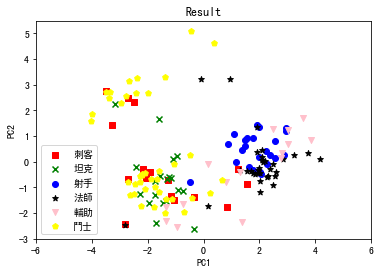

In [18]:
color = ['red', 'green', 'blue','black','pink','yellow']
marker = ['s', 'x', 'o','*','v','p']
for l, c, m in zip(np.unique(df.iloc[:,0]), color, marker):
    print(l)
    plt.scatter(lol_pca[df.iloc[:,0] == l, 0],
                lol_pca[df.iloc[:,0] == l, 1],
                c=c, label=l, marker=m)
plt.title('Result')
plt.xlim(-6,6)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(loc='lower left')

plt.show()

In [19]:
dfw=pd.DataFrame(w.T)
dfw.index=['first','second']
dfw.columns=df.iloc[:,1:].columns
dfw.style.background_gradient(cmap='prism_r').format("{:.2}")

,攻擊距離,魔力,魔力回復,魔力提升,生命提升,生命,生命回復,移動速度,物理攻擊,物理防禦,魔法防禦
first,0.43,0.28,0.19,0.14,-0.14,-0.32,-0.31,-0.33,-0.35,-0.34,-0.34
second,0.071,-0.43,-0.56,-0.5,-0.32,-0.24,-0.21,0.013,-0.021,-0.079,-0.16


In [20]:
for l, c, m in zip(np.unique(df.iloc[:,0]), color, marker):
    print(l)

刺客
坦克
射手
法師
輔助
鬥士


In [21]:
dfw.values.T*10

array([[ 4.29749648,  0.71160768],
       [ 2.83101999, -4.30316722],
       [ 1.90597913, -5.62307847],
       [ 1.42737592, -5.0359551 ],
       [-1.41042353, -3.23768843],
       [-3.15873686, -2.43256714],
       [-3.06874661, -2.08977445],
       [-3.33237109,  0.13489715],
       [-3.50326644, -0.20610777],
       [-3.41915625, -0.7947743 ],
       [-3.3755548 , -1.59279649]])

In [22]:
for x in dfw:
    b=dfw[x]
    print(b[0]*10,b[1]*10)

4.297496482223099 0.711607675487062
2.831019985135714 -4.30316722321906
1.9059791294697124 -5.623078474720784
1.427375917978094 -5.0359551034651755
-1.4104235302295567 -3.237688426201877
-3.15873686132776 -2.43256714312618
-3.0687466067078555 -2.08977445132668
-3.3323710862804967 0.13489714705382083
-3.5032664437141623 -0.20610777356867196
-3.419156253720455 -0.794774304749303
-3.3755548027309192 -1.5927964935047698
